# word2vec 
Presentation by: Lauren Funston

## What is word2vec? 
word2vec is an open-source project created by Google in 2013 that takes a corpus (large body of text) and converts the words into vector representations, based on the context in which they appear. This allows "clusters" of similar words to be found (for example, the word "piano" is similar to other instruments, such as "guitar", "violin", etc.) This has a number of applications, such as text prediction, translation, and analysis. The image below shows an example of translation: models can be created for each language, and the clusters formed will likely be similar between languages, allowing for translation based on cluster locations. 

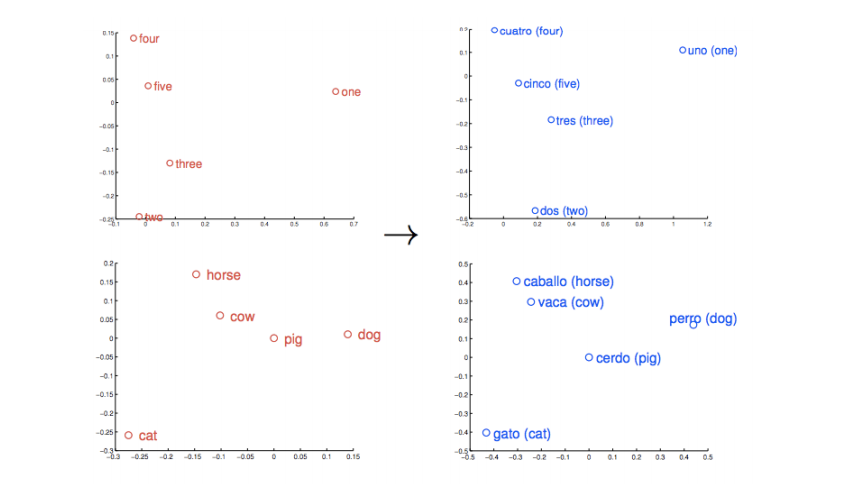

Source: [A Beginner's Guide to Word2Vec and Neural Word Embeddings (pathmind.com)](https://wiki.pathmind.com/word2vec)


## How does it work? 
word2vec goes through a corpus document word-by-word, updating the vector for each word as it goes based on how reliably it is able to predict the words surrounding that word. The context window is a parameter for the algorithm, usually set to around 10 words (as recommended by the original authors). The resulting vectors are usually in 100+ dimensional space (the number of dimensions is also a parameter).

Once vectors have been created, they are compared using *cosine similarity*. Essentially, the cosine of the angle between two vectors is taken. A value closer to 0 indicates that words are less similar/have no relationship, and the cosine of two orthogonal vectors is 0 ($\cos(\frac{\pi}{2}) = 0$). A value closer to 1 indicates that words are more similar, and the cosine of two identical vectors is 1 ($\cos(0) = 1$). A value close to -1 indicates that words have the opposite meaning, and the cosine of two opposite vectors is -1 ($\cos(\pi) = -1$)

The cosine between two vectors can be derived from their inner product:
$$ A \cdot B = \lvert \lvert A \rvert \rvert \lvert \lvert B \rvert \rvert \cos(\theta)$$
$$ \cos(\theta) = \frac{A \cdot B}{\lvert \lvert A \rvert \rvert \lvert \lvert B \rvert \rvert}$$
Thus the complete equation for computing the cosine similarity of two vectors is as follows: 
$$ \cos(\theta) = \frac{\sum_{i=1}^n A_i \times B_i}{\sqrt{\sum_{i=1}^n A_i^2} \times \sqrt{\sum_{i=1}^n B_i^2}}$$

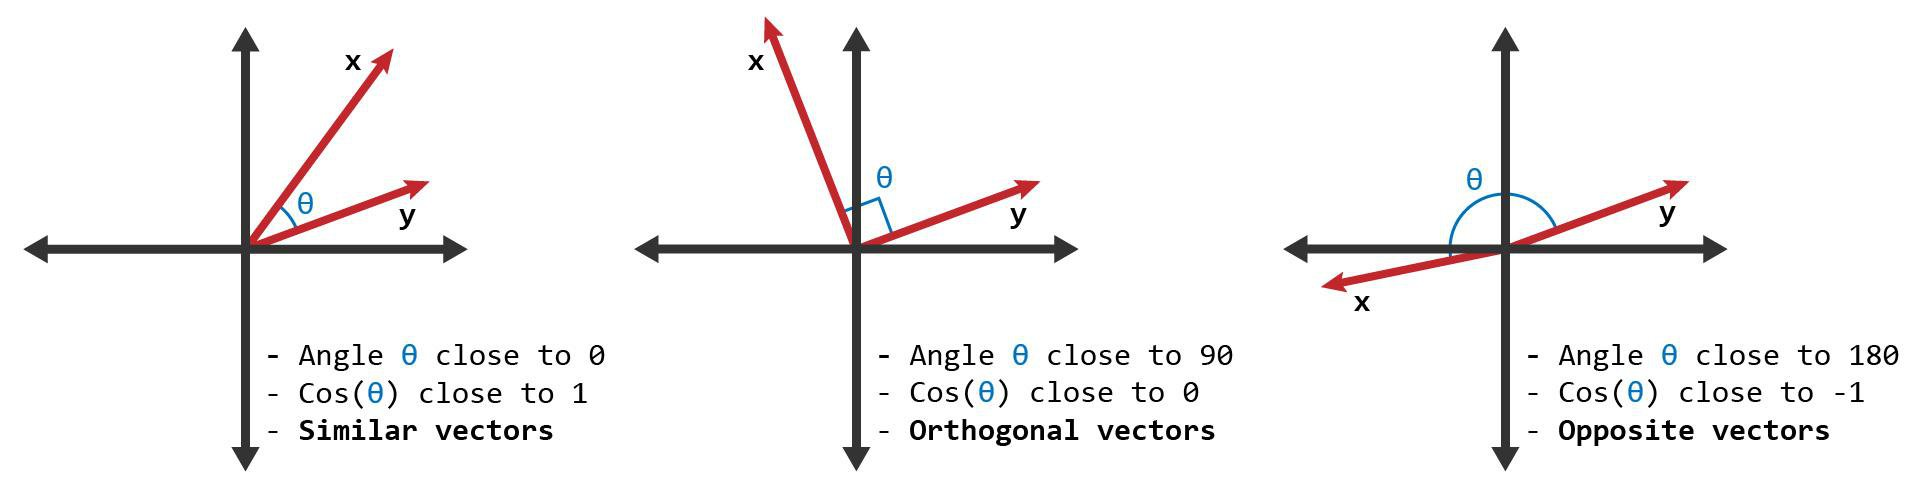

Source: [Cosine Similarity (datasci.com)](https://www.learndatasci.com/glossary/cosine-similarity/)

## Examples

We need to start by training the model (aka, create the vectors) using a corpus. I've included in this repository the one linked in the [documentation](https://nbviewer.org/github/danielfrg/word2vec/blob/main/examples/word2vec.ipynb).

In [4]:
import word2vec
# size here refers to dimensionality of vectors
word2vec.word2vec('example/data/text8', 'example/data/text8.bin', size=100, binary=True, verbose=True)

Running command: word2vec -train example/data/text8 -output example/data/text8.bin -size 100 -window 5 -sample 1e-3 -hs 0 -negative 5 -threads 12 -iter 5 -min-count 5 -alpha 0.025 -debug 2 -binary 1 -cbow 1
Starting training using file example/data/text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000002  Progress: 100.04%  Words/thread/sec: 403.19k  c: 353.01k  6.52k  ec: 384.80k  : 0.024718  Progress: 1.14%  Words/thread/sec: 373.64k  667  Progress: 1.34%  Words/thread/sec: 391.09k  ogress: 1.55%  Words/thread/sec: 385.46k  read/sec: 393.34k  ha: 0.024308  Progress: 2.78%  Words/thread/sec: 393.18k   3.40%  Words/thread/sec: 399.79k   ec: 400.35k  .44k   Progress: 4.85%  Words/thread/sec: 398.84k  /thread/sec: 399.81k  ss: 6.70%  Words/thread/sec: 401.51k  Words/thread/sec: 401.07k  02.45k  k  d/sec: 402.04k  61%  Words/thread/sec: 403.08k  rds/thread/sec: 403.23k  022589  Progress: 9.66%  Words/thread/sec: 401.11k  3  Progress: 10.28%  Words/thread/sec: 401.04k  : 400.6

Now that we've trained the model, we can view the vectors that were generated: 

In [5]:
model = word2vec.load('example/data/text8.bin')
model.vectors.shape

(71291, 100)

Note the dimensions of the array: there are 71291 words, and each is represented by a dimension 100 vector. 

We can now use the model to find similar words: 

In [6]:
indexes, metrics = model.similar("piano")
model.vocab[indexes]

array(['violin', 'cello', 'sonatas', 'harpsichord', 'sonata', 'concertos',
       'concerto', 'orchestral', 'orchestra', 'quartet'], dtype='<U78')

The model returns words that are instruments and/or have to do with music. So far so good! 

Let's see an example of using an analogy. The analogy I'll be using here is "Beijing - China + Russia", and the answer I'm expecting is "Moscow" (I know that Beijing is the capital of China, but I want to know the capital of Russia):

In [7]:
indexes, metrics = model.analogy(pos=["beijing", "russia"], neg=["china"])
model.vocab[indexes]

array(['moscow', 'helsinki', 'riga', 'lisbon', 'transylvania', 'brussels',
       'barcelona', 'munich', 'budapest', 'switzerland'], dtype='<U78')

Awesome, it got "Moscow" as the first guess, with various other European cities as the next most likely choices. 

## Question

I'm curious about the appropriate size of a corpus in order to properly train the model. The corpus included here (and linked in the documentation) is quite large, but seems to work quite well. I wonder if an even larger corpus would increase the accuracy of the model, or if it would significantly slow it down; similarly, if a smaller corpus would be able to be just as accurate and/or quicker. 

## Proposed Experiment

I think the dimensionality of the vectors is an interesting aspect of the algorithm, and ties back to the idea of bias vs. variance that we've been discussing in class. It seems that the 100-dimension vectors used in the example is on the lower end of dimensions used for this algorithms (most examples I've seen have used 500+). My experiment would be to see how the "accuracy" of the algorithm improves (or declines) as more dimensions are added to the vectors. I imagine that adding more dimensions would helpful for a bit to create a better "fit" for the model as it would be able to provide more information about each word (thus reducing bias), but I also think that after a certain point, too many dimensions would slow down the algorithm and introduce too much noise to the results (increasing variance). 

My proposed experiment would have a set of proposed analogies with an expected "correct" answer, and measure how well the algorithm is able to get the correct answer based on how many dimensions are included in the vectors. So dimensionality would be on the x axis, ranging from 100 to, say 10000 (not sure if that's computationally realistic) and on the y axis would be accuracy. 

As a closing example, here's the 100-dimension model failing to answer a similar analogy accurately (Rome - Italy + America), which should ideally return a value like "Washington D.C." (the capital of the US). Would increasing the dimensionality of the model improve the guesses? 

In [10]:
indexes, metrics = model.analogy(pos=["rome", "america"], neg=["italy"])
model.vocab[indexes]

array(['mormon', 'carolina', 'men', 'nicaea', 'lincoln', 'women', 'bible',
       'prayer', 'chalcedon', 'dedication'], dtype='<U78')